In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
import pandas as pd
import collections
import string
%matplotlib inline

from cipher.affine import *
from cipher.keyword_cipher import *
from support.utilities import *
from support.text_prettify import *
from support.language_models import *
from support.plot_frequency_histogram import *

c3a = open('3a.ciphertext').read()
c3b = open('3b.ciphertext').read()

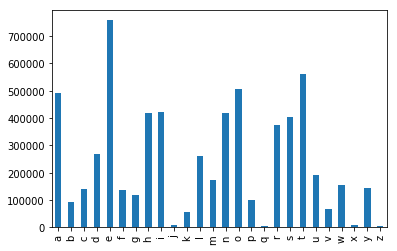

In [2]:
freqs = pd.Series(english_counts)
freqs.plot(kind='bar')

In [3]:
key_a, score = affine_break(c3a)
key_a, score

((11, 1, True), -839.4977013876568)

In [4]:
print(lcat(tpack(segment(affine_decipher(sanitise(c3a), key_a[0], key_a[1])))))

harry you asked me about the flag day associates they area transnational hacking group dedicated to
the overthrow of western capitalism they have been implicated in several major protests including an
attempt to takeover the uk national grid attacks on reservoir systems and interference in bank
trading networks it looks like the fda carried out fairly extensive modifications to the ship they
did a good job too we hadnt noticed the added bulkheads until we compared the layout with the plans
from lloyds register they seem to be there to add rigidity though there is one additional panel at
the stern that doesnt fit the pattern and we will be removing that tonight to see what it is there
for we would have done it this afternoon but decided we should conduct our own hull survey in case
there is a booby trap


In [5]:
key_b, score = keyword_break_mp(c3b)
key_b, score

(('seahorse', <KeywordWrapAlphabet.from_last: 2>), -681.3308426043137)

In [6]:
print(lcat(tpack(segment(sanitise(keyword_decipher(c3b, key_b[0], key_b[1]))))))

phase three the nautilus system was fully tested last night with complete success we sailed within
four hundred metres of the target and monitored all radio traffic for two hours with no sign that we
were being watched or were even noticed we then conducted a full radar sweep of the area and found
three dead spots where we could work on the ship without detection as planned we converted the two
adjacent empty containers in the middle of the stack into a large workshop area and carried out a
full inspection drill now even if we are boarded our work should remain undetected we retrieved
seahorse from the third container and carried out stage one of the assembly


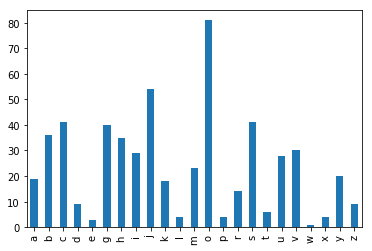

In [7]:
freqs_3b = pd.Series(collections.Counter([l.lower() for l in c3b if l in string.ascii_letters]))
freqs_3b.plot(kind='bar')